In [11]:
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../../mbspbs10pc')

from mbspbs10pc import utils

# Check MBS-PBS 10% data availability

In [13]:
ROOT = os.path.join('..','..','..','data')

mbs_files = filter(lambda x: x.startswith('MBS'), os.listdir(ROOT))
pbs_files = filter(lambda x: x.startswith('PBS'), os.listdir(ROOT))
sample_pin_lookout = filter(lambda x: x.startswith('SAMPLE'), os.listdir(ROOT))[0]

print('MBS files:')
for mbs in mbs_files:
    print('{}'.format(os.path.join(ROOT, mbs)))
    
print('PBS files:')
for pbs in pbs_files:
    print('{}'.format(os.path.join(ROOT, pbs)))
    
print('Sample PIN lookout: {}'.format(os.path.join(ROOT, sample_pin_lookout)))

MBS files:
../../../data/MBS_SAMPLE_10PCT_2010.csv
../../../data/MBS_SAMPLE_10PCT_2013.csv
../../../data/MBS_SAMPLE_10PCT_2008.csv
../../../data/MBS_SAMPLE_10PCT_2009.csv
../../../data/MBS_SAMPLE_10PCT_2011.csv
../../../data/MBS_SAMPLE_10PCT_2014.csv
../../../data/MBS_SAMPLE_10PCT_2012.csv
PBS files:
../../../data/PBS_SAMPLE_10PCT_2010.csv
../../../data/PBS_SAMPLE_10PCT_2011.csv
../../../data/PBS_SAMPLE_10PCT_2012.csv
../../../data/PBS_SAMPLE_10PCT_2009.csv
../../../data/PBS_SAMPLE_10PCT_2013.csv
../../../data/PBS_SAMPLE_10PCT_2008.csv
Sample PIN lookout: ../../../data/SAMPLE_PIN_LOOKUP.csv


# PBS take a look

In [14]:
filename = pbs_files[-1]
print(filename)
df = pd.read_csv(os.path.join(ROOT, '{}'.format(filename)), header=0, index_col=0,
                 nrows=1000, usecols=['PTNT_ID','PTNT_CTGRY_DRVD_CD'])
df.shape

PBS_SAMPLE_10PCT_2008.csv


(1000, 1)

In [15]:
len(df)

1000

In [19]:
np.unique(df.index)

array([   2587766,    3857591,   27347330,   28659674,   59363672,
         81376412,   84798106,   88593813,   97434693,  115051471,
        117339514,  122666807,  125347486,  134227320,  137227604,
        150328145,  166459456,  178261244,  218528389,  226288048,
        242942868,  253597416,  290485411,  292793787,  302004964,
        304632946,  314532735,  319943353,  319992460,  331442574,
        339798899,  371872816,  410343357,  433459236,  453806068,
        460306234,  464207336,  482533033,  491168324,  493685610,
        493780825,  495871554,  504319825,  505839521,  506660424,
        520639714,  531542421,  540653530,  543422539,  589509975,
        590825613,  596300638,  608867517,  611818271,  613061006,
        615938705,  616900815,  636595000,  641427700,  663469216,
        706692389,  715222133,  727640920,  733343952,  742847517,
        743486727,  744027275,  762378631,  768130744,  772893709,
        782314091,  787654974,  794603882,  801347022,  801607

# Drugs used in diabetes

In [91]:
_dd = pd.read_csv(os.path.join('..', 'data', 'drugs_used_in_diabetes.csv'), header=0)

# Fix 6-digit notation
dd = set()
for item in _dd.values.ravel():
    if len(item)<6:
        dd.add(str(0)+item)
    else:
        dd.add(item)

# FIXME - exclude Metformins and Sulfonamides
dd = pd.DataFrame(data=list(dd), columns=_dd.columns)
ms = pd.read_csv(os.path.join('..', 'data', 'metformins_sulfonamides.csv'), header=0)
mask = []
for d in dd.values:
    mask.append(d not in ms.values)
dd = pd.DataFrame(data=dd.values[mask], columns=dd.columns)
print(dd.shape)

(76, 1)


In [92]:
dd.head()

,ITM_CD
0,09061X
1,09180E
2,10649L
3,01763T
4,09449H


In [93]:
dd_set = set(list(dd.values.ravel()))

# Filter diabetes

In [146]:
filename = 'PBS_SAMPLE_10PCT_2011.csv'
costs = pd.read_csv(os.path.join(ROOT, '{}'.format(filename)), header=0,
                    usecols=['BNFT_AMT', 'PTNT_CNTRBTN_AMT', 'ITM_CD', 'SPPLY_DT'])
costs.head()

,SPPLY_DT,ITM_CD,BNFT_AMT,PTNT_CNTRBTN_AMT
0,23NOV2011,09110L,28.19,0.0
1,05JUL2011,01558B,6.96,5.6
2,17SEP2011,08008L,30.71,0.0
3,23JUN2011,02843P,6.82,5.6
4,24MAR2011,08784H,5.10,0.0


In [147]:
dd_costs = costs.loc[costs['ITM_CD'].isin(dd_set)]
print(dd_costs.shape)

(215228, 4)


In [148]:
dd_costs['TOT'] = dd_costs['BNFT_AMT'] + dd_costs['PTNT_CNTRBTN_AMT']

/Users/samu/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [149]:
dd_costs.sort_values(by='TOT').head()

,SPPLY_DT,ITM_CD,BNFT_AMT,PTNT_CNTRBTN_AMT,TOT
3724230,23NOV2011,08694N,3.11,0.0,3.11
854527,26DEC2011,08838E,0.31,5.8,6.11
4705379,06OCT2011,08811R,3.54,5.6,9.14
12463310,28JAN2011,08838E,7.62,5.6,13.22
14740494,02DEC2011,08838E,7.62,5.6,13.22


Text(0.5,1,u'2011')

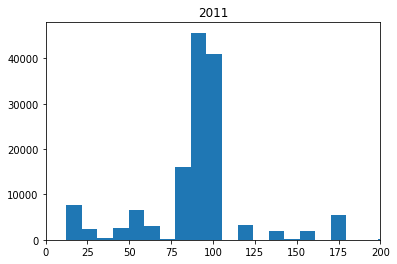

In [150]:
plt.hist(dd_costs['TOT'], bins=200)
plt.xlim([0,200])
plt.title(2011)

Text(0.5,1,u'2012')

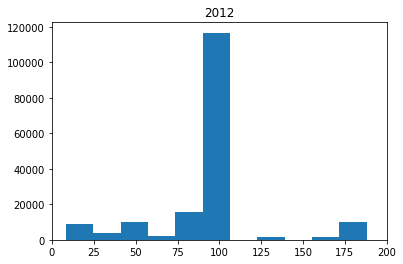

In [145]:
plt.hist(dd_costs['TOT'], bins=200)
plt.xlim([0,200])
plt.title(2012)

In [119]:
#costs[np.logical_and(costs['PTNT_CNTRBTN_AMT'] > 35.4, costs['ITM_CD'].isin(dd_set))]

In [120]:
over_copayment = []
below_copayment = []
thresholds = [31.3, 32.9, 33.3, 34.2, 35.4, 36.1]

for year, thresh in zip(np.arange(2008,2014), thresholds):
    print('Reading {}'.format(year))
    filename = 'PBS_SAMPLE_10PCT_'+str(year)+'.csv'
    costs = pd.read_csv(os.path.join(ROOT, '{}'.format(filename)), header=0,
                        usecols=['BNFT_AMT', 'PTNT_CNTRBTN_AMT', 'ITM_CD', 'SPPLY_DT'])
    dd_costs = costs.loc[costs['ITM_CD'].isin(dd_set)] # filter for diabetes
    
    c = dd_costs['BNFT_AMT'] + dd_costs['PTNT_CNTRBTN_AMT']
    
    break

Reading 2008


In [124]:
len(np.where(c > thresh)[0])

114891

In [126]:
len(c)

125842

# Costs plot

In [114]:
#idx = np.where(np.logical_and(costs['PTNT_CNTRBTN_AMT'].values > 0, costs['PTNT_CNTRBTN_AMT'].values < 50))

In [115]:
xx = dd_costs['BNFT_AMT']
print(xx.min())

0.17


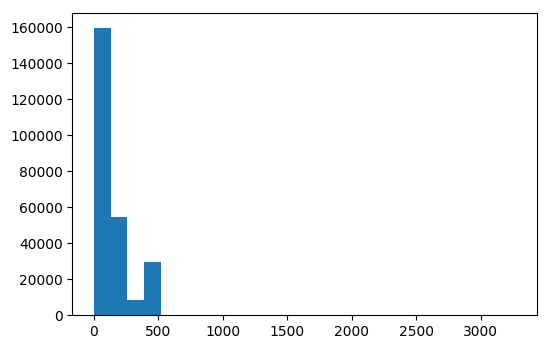

In [109]:
plt.figure(dpi=100)
plt.hist(xx, bins=25);

# Summary plots

In [46]:
import cPickle as pkl

with open('../tmp/3_df_yearly_no_copayment.pkl','rb') as f:
    dfy = pkl.load(f)

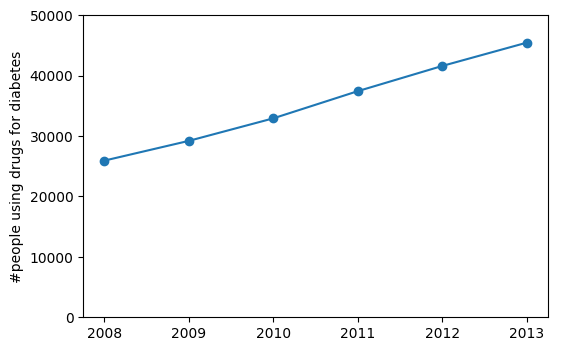

In [155]:
plt.figure(dpi=100)
lengths = [len(dfy['PBS_SAMPLE_10PCT_'+str(k)+'.csv']) for k in np.arange(2008,2014)]
plt.plot(np.arange(2008,2014), lengths, '-o')
plt.ylabel('#people using drugs for diabetes')
plt.ylim([0, 50000])
plt.savefig('../tmp/people_using_dd.png');

In [153]:
starting = []
for target_year in np.arange(2009, 2014):
    # From the target year, go backward and find the subjects
    # that were prescribed with diabete control drugs for the
    # first time
    positive_subjects = set(dfy['PBS_SAMPLE_10PCT_'+str(target_year)+'.csv'])

    for year in np.arange(2008, target_year)[::-1]:
        curr = set(dfy['PBS_SAMPLE_10PCT_'+str(year)+'.csv'])
        positive_subjects = set(filter(lambda x: x not in curr, positive_subjects))
    starting.append(len(positive_subjects))

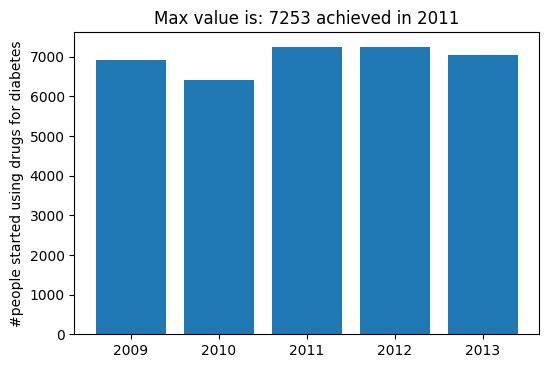

In [154]:
plt.figure(dpi=100)
plt.bar(np.arange(len(starting)), starting)
plt.xticks(np.arange(len(starting)), np.arange(2009, 2014))
plt.ylabel('#people started using drugs for diabetes')
plt.title('Max value is: {} achieved in {}'.format(np.max(starting),
                                             np.arange(2009, 2014)[np.argmax(starting)]))
plt.savefig('../tmp/people_started_using_dd.png');

# Monthly summary plots

In [132]:
import cPickle as pkl

with open('../tmp/df3.pkl','rb') as f:
    dfy = pkl.load(f)

In [133]:
lengths = []
xaxis = []
for year in range(2008, 2014):
    df_year = dfy['PBS_SAMPLE_10PCT_'+str(year)+'.csv']
    
    for month in range(1, 13):
        df_month = df_year[month]
        lengths.append(len(df_month)) 
        xaxis.append(str(month)+'-'+str(year))
lengths = np.array(lengths)

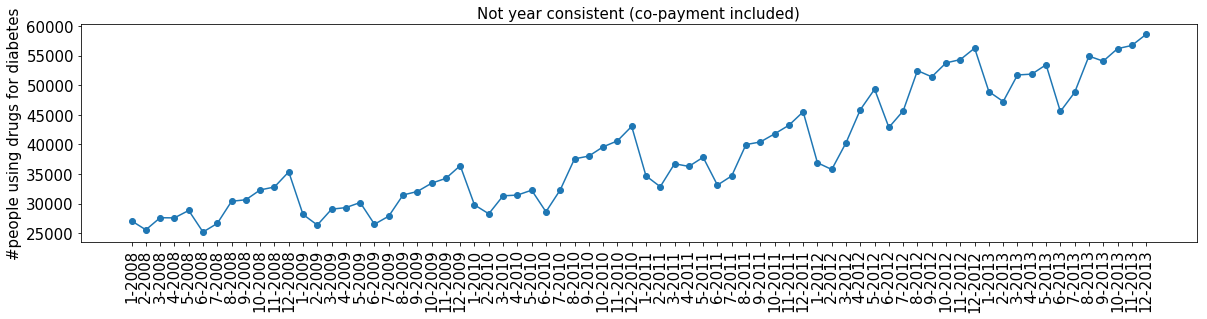

In [135]:
plt.figure(figsize=(20, 4))
plt.plot(np.arange(len(lengths)), lengths, '-o')
plt.ylabel('#people using drugs for diabetes', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(len(lengths)), xaxis, rotation='vertical', fontsize=15)
plt.title('Not year consistent (co-payment included)', fontsize=15)
plt.savefig('../tmp/people_using_dd_monthly_breakdown_yes_copay.png');

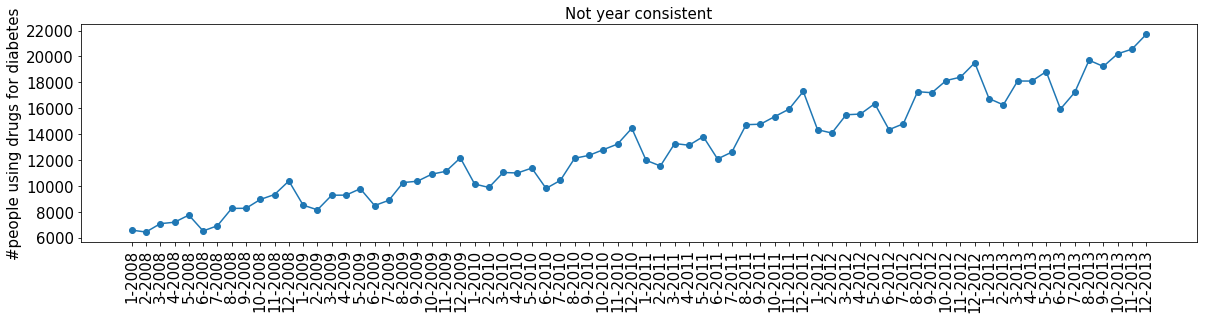

In [125]:
#plt.figure(figsize=(20, 4))
#plt.plot(np.arange(len(lengths)), lengths, '-o')
#plt.ylabel('#people using drugs for diabetes', fontsize=15)
#plt.yticks(fontsize=15)
#plt.xticks(np.arange(len(lengths)), xaxis, rotation='vertical', fontsize=15)
#plt.title('Not year consistent', fontsize=15)
#plt.savefig('../tmp/people_using_dd_monthly_breakdown.png');

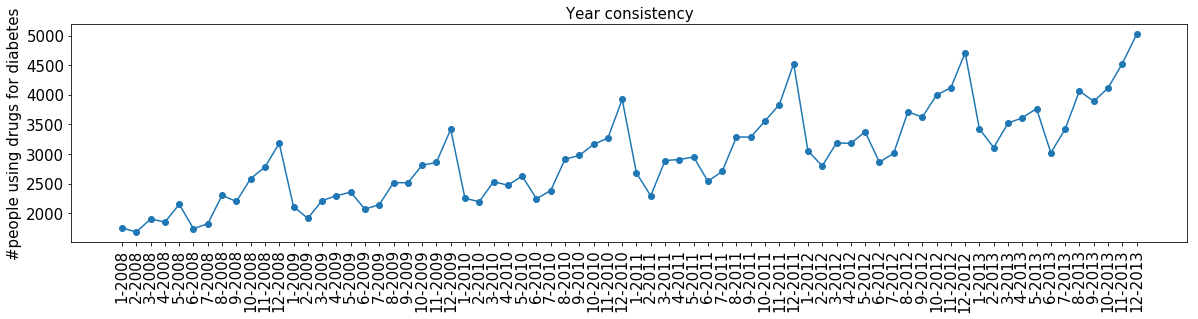

In [122]:
#plt.figure(figsize=(20, 4))
#plt.plot(np.arange(len(lengths)), lengths, '-o')
#plt.ylabel('#people using drugs for diabetes', fontsize=15)
#plt.yticks(fontsize=15)
#plt.xticks(np.arange(len(lengths)), xaxis, rotation='vertical', fontsize=15)
#plt.title('Year consistency', fontsize=15)
#plt.savefig('../tmp/people_using_dd_year_consistent_monthly_breakdown.png');

In [136]:
month_year = [x.split('-') for x in xaxis]
starting = []
for i, (target_month, target_year) in enumerate(month_year):
    print('{})----------------------------'.format(i))
    print('target: ', target_month, target_year)
    positive_subjects = set(dfy['PBS_SAMPLE_10PCT_'+str(target_year)+'.csv'][int(target_month)])
    
    for month, year in month_year[:i][::-1]:
        print('look', month, year)
        curr = set(dfy['PBS_SAMPLE_10PCT_'+str(year)+'.csv'][int(month)])
        positive_subjects = set(filter(lambda x: x not in curr, positive_subjects))
    starting.append(len(positive_subjects))

0)----------------------------
('target: ', '1', '2008')
1)----------------------------
('target: ', '2', '2008')
('look', '1', '2008')
2)----------------------------
('target: ', '3', '2008')
('look', '2', '2008')
('look', '1', '2008')
3)----------------------------
('target: ', '4', '2008')
('look', '3', '2008')
('look', '2', '2008')
('look', '1', '2008')
4)----------------------------
('target: ', '5', '2008')
('look', '4', '2008')
('look', '3', '2008')
('look', '2', '2008')
('look', '1', '2008')
5)----------------------------
('target: ', '6', '2008')
('look', '5', '2008')
('look', '4', '2008')
('look', '3', '2008')
('look', '2', '2008')
('look', '1', '2008')
6)----------------------------
('target: ', '7', '2008')
('look', '6', '2008')
('look', '5', '2008')
('look', '4', '2008')
('look', '3', '2008')
('look', '2', '2008')
('look', '1', '2008')
7)----------------------------
('target: ', '8', '2008')
('look', '7', '2008')
('look', '6', '2008')
('look', '5', '2008')
('look', '4', '2

('look', '3', '2009')
('look', '2', '2009')
('look', '1', '2009')
('look', '12', '2008')
('look', '11', '2008')
('look', '10', '2008')
('look', '9', '2008')
('look', '8', '2008')
('look', '7', '2008')
('look', '6', '2008')
('look', '5', '2008')
('look', '4', '2008')
('look', '3', '2008')
('look', '2', '2008')
('look', '1', '2008')
28)----------------------------
('target: ', '5', '2010')
('look', '4', '2010')
('look', '3', '2010')
('look', '2', '2010')
('look', '1', '2010')
('look', '12', '2009')
('look', '11', '2009')
('look', '10', '2009')
('look', '9', '2009')
('look', '8', '2009')
('look', '7', '2009')
('look', '6', '2009')
('look', '5', '2009')
('look', '4', '2009')
('look', '3', '2009')
('look', '2', '2009')
('look', '1', '2009')
('look', '12', '2008')
('look', '11', '2008')
('look', '10', '2008')
('look', '9', '2008')
('look', '8', '2008')
('look', '7', '2008')
('look', '6', '2008')
('look', '5', '2008')
('look', '4', '2008')
('look', '3', '2008')
('look', '2', '2008')
('look', 

('look', '4', '2008')
('look', '3', '2008')
('look', '2', '2008')
('look', '1', '2008')
40)----------------------------
('target: ', '5', '2011')
('look', '4', '2011')
('look', '3', '2011')
('look', '2', '2011')
('look', '1', '2011')
('look', '12', '2010')
('look', '11', '2010')
('look', '10', '2010')
('look', '9', '2010')
('look', '8', '2010')
('look', '7', '2010')
('look', '6', '2010')
('look', '5', '2010')
('look', '4', '2010')
('look', '3', '2010')
('look', '2', '2010')
('look', '1', '2010')
('look', '12', '2009')
('look', '11', '2009')
('look', '10', '2009')
('look', '9', '2009')
('look', '8', '2009')
('look', '7', '2009')
('look', '6', '2009')
('look', '5', '2009')
('look', '4', '2009')
('look', '3', '2009')
('look', '2', '2009')
('look', '1', '2009')
('look', '12', '2008')
('look', '11', '2008')
('look', '10', '2008')
('look', '9', '2008')
('look', '8', '2008')
('look', '7', '2008')
('look', '6', '2008')
('look', '5', '2008')
('look', '4', '2008')
('look', '3', '2008')
('look', 

('look', '9', '2011')
('look', '8', '2011')
('look', '7', '2011')
('look', '6', '2011')
('look', '5', '2011')
('look', '4', '2011')
('look', '3', '2011')
('look', '2', '2011')
('look', '1', '2011')
('look', '12', '2010')
('look', '11', '2010')
('look', '10', '2010')
('look', '9', '2010')
('look', '8', '2010')
('look', '7', '2010')
('look', '6', '2010')
('look', '5', '2010')
('look', '4', '2010')
('look', '3', '2010')
('look', '2', '2010')
('look', '1', '2010')
('look', '12', '2009')
('look', '11', '2009')
('look', '10', '2009')
('look', '9', '2009')
('look', '8', '2009')
('look', '7', '2009')
('look', '6', '2009')
('look', '5', '2009')
('look', '4', '2009')
('look', '3', '2009')
('look', '2', '2009')
('look', '1', '2009')
('look', '12', '2008')
('look', '11', '2008')
('look', '10', '2008')
('look', '9', '2008')
('look', '8', '2008')
('look', '7', '2008')
('look', '6', '2008')
('look', '5', '2008')
('look', '4', '2008')
('look', '3', '2008')
('look', '2', '2008')
('look', '1', '2008')
4

('look', '4', '2012')
('look', '3', '2012')
('look', '2', '2012')
('look', '1', '2012')
('look', '12', '2011')
('look', '11', '2011')
('look', '10', '2011')
('look', '9', '2011')
('look', '8', '2011')
('look', '7', '2011')
('look', '6', '2011')
('look', '5', '2011')
('look', '4', '2011')
('look', '3', '2011')
('look', '2', '2011')
('look', '1', '2011')
('look', '12', '2010')
('look', '11', '2010')
('look', '10', '2010')
('look', '9', '2010')
('look', '8', '2010')
('look', '7', '2010')
('look', '6', '2010')
('look', '5', '2010')
('look', '4', '2010')
('look', '3', '2010')
('look', '2', '2010')
('look', '1', '2010')
('look', '12', '2009')
('look', '11', '2009')
('look', '10', '2009')
('look', '9', '2009')
('look', '8', '2009')
('look', '7', '2009')
('look', '6', '2009')
('look', '5', '2009')
('look', '4', '2009')
('look', '3', '2009')
('look', '2', '2009')
('look', '1', '2009')
('look', '12', '2008')
('look', '11', '2008')
('look', '10', '2008')
('look', '9', '2008')
('look', '8', '2008'

('look', '12', '2008')
('look', '11', '2008')
('look', '10', '2008')
('look', '9', '2008')
('look', '8', '2008')
('look', '7', '2008')
('look', '6', '2008')
('look', '5', '2008')
('look', '4', '2008')
('look', '3', '2008')
('look', '2', '2008')
('look', '1', '2008')
62)----------------------------
('target: ', '3', '2013')
('look', '2', '2013')
('look', '1', '2013')
('look', '12', '2012')
('look', '11', '2012')
('look', '10', '2012')
('look', '9', '2012')
('look', '8', '2012')
('look', '7', '2012')
('look', '6', '2012')
('look', '5', '2012')
('look', '4', '2012')
('look', '3', '2012')
('look', '2', '2012')
('look', '1', '2012')
('look', '12', '2011')
('look', '11', '2011')
('look', '10', '2011')
('look', '9', '2011')
('look', '8', '2011')
('look', '7', '2011')
('look', '6', '2011')
('look', '5', '2011')
('look', '4', '2011')
('look', '3', '2011')
('look', '2', '2011')
('look', '1', '2011')
('look', '12', '2010')
('look', '11', '2010')
('look', '10', '2010')
('look', '9', '2010')
('look

('look', '6', '2013')
('look', '5', '2013')
('look', '4', '2013')
('look', '3', '2013')
('look', '2', '2013')
('look', '1', '2013')
('look', '12', '2012')
('look', '11', '2012')
('look', '10', '2012')
('look', '9', '2012')
('look', '8', '2012')
('look', '7', '2012')
('look', '6', '2012')
('look', '5', '2012')
('look', '4', '2012')
('look', '3', '2012')
('look', '2', '2012')
('look', '1', '2012')
('look', '12', '2011')
('look', '11', '2011')
('look', '10', '2011')
('look', '9', '2011')
('look', '8', '2011')
('look', '7', '2011')
('look', '6', '2011')
('look', '5', '2011')
('look', '4', '2011')
('look', '3', '2011')
('look', '2', '2011')
('look', '1', '2011')
('look', '12', '2010')
('look', '11', '2010')
('look', '10', '2010')
('look', '9', '2010')
('look', '8', '2010')
('look', '7', '2010')
('look', '6', '2010')
('look', '5', '2010')
('look', '4', '2010')
('look', '3', '2010')
('look', '2', '2010')
('look', '1', '2010')
('look', '12', '2009')
('look', '11', '2009')
('look', '10', '2009'

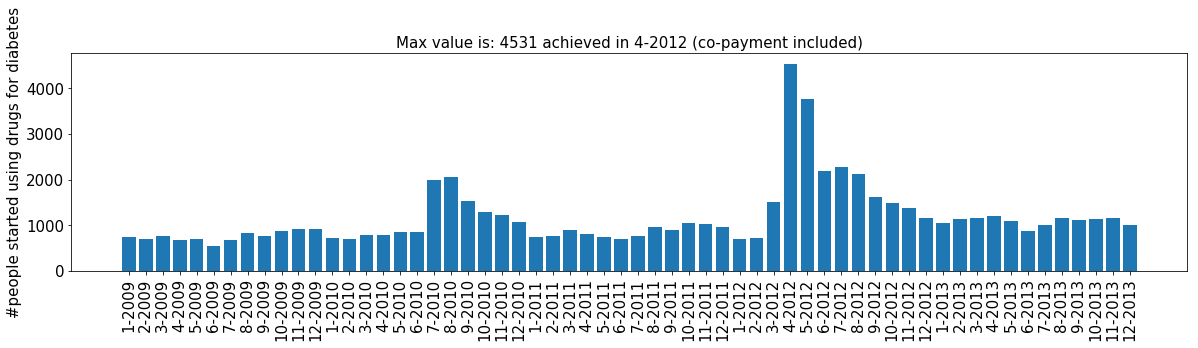

In [139]:
_starting = starting[12:]

plt.figure(figsize=(20, 4))
plt.bar(np.arange(len(_starting)), _starting)
plt.xticks(np.arange(len(xaxis[12:])), xaxis[12:], rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('#people started using drugs for diabetes', fontsize=15)
plt.title('Max value is: {} achieved in {} (co-payment included)'.format(np.max(_starting),
                                             xaxis[12:][np.argmax(_starting)]), fontsize=15);
plt.savefig('../tmp/people_started_using_dd_monthly_breakdown_copayment.png');

In [47]:
dd = dfy

In [43]:
curr = set(pd.read_csv('../../../data/PBS_SAMPLE_10PCT_2008.csv', header=0, usecols=['PTNT_ID']).values.ravel())

In [60]:
len(curr)

880553

In [50]:
diabete = set(dd['PBS_SAMPLE_10PCT_2008.csv'])

In [53]:
len(diabete)

25935

In [58]:
out = set(filter(lambda x: x not in diabete, curr))

In [59]:
len(out)

854618

In [63]:
len(diabete) + len(curr)

906488

In [64]:
len(out.intersection(diabete))

0

In [70]:
a = set([1,2,3])
b = set([1,2,3])

print(a.union(b))

set([1, 2, 3])


In [75]:
pos = pd.read_csv('../tmp/3_df_yearly_no_copayment_class_1.csv', header=0)
neg = pd.read_csv('../tmp/3_df_yearly_no_copayment_class_0.csv', header=0)

In [76]:
ii = np.intersect1d(pos.values.ravel(), neg.values.ravel())


[]
0


In [20]:
import cPickle as pkl
cc = pkl.load(open('../tmp/dump1_cont_.pkl','rb'))

In [23]:
len(np.unique(cc))

641696

In [24]:
len(cc)

641696

In [34]:
pbs = '../../../data/PBS_SAMPLE_10PCT_2008.csv'
df = pd.read_csv(pbs, header=0, index_col=0,
                         usecols=['PTNT_ID', 'PTNT_CTGRY_DRVD_CD'])

In [35]:
df_counter = Counter(df.index)

In [36]:
c0c1 = df.loc[df['PTNT_CTGRY_DRVD_CD'].isin(['C0', 'C1'])]

In [37]:
c0c1_counter = Counter(c0c1.index)

In [40]:
usage = {}
for k in c0c1_counter.keys():
    usage[k] = c0c1_counter[k] / df_counter[k]

In [44]:
usage_df = pd.DataFrame.from_dict(usage, orient='index').rename({0: 'COUNTS'}, axis=1)
usage_df = usage_df[usage_df['COUNTS'] >= 0.5]

In [46]:
usage_df.shape

(577304, 1)

In [47]:
a = set([1,2,3])
b = set([4,5,6])


In [48]:
a.intersection(b)

set()